# Confusion Matrix


A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarised with count values.

\
![alt text](https://drive.google.com/uc?export=view&id=1DVoA_osh-reSf2nN2cRG8nKx5t3Tx1m_)

\
Remember that we have studied the binary type of logistic regression, where the outcome is either True, or False.

In this confusion matrix, the values are as follows -


1.   True Positives - The values that were actually True and were predicted to be True as well
2.   True Negatives - The values that were actually False and were predicted to be False as well
3.   False Positives - The values that were actually False but were predicted to be True.
4.   False Negatives - The values that were actually True but where predicted to be False.



\
# Accuracy


The accuracy of a model is equal to -


True Positives + True Negatives / True Positives + True Negatives + False Positives + False Negatives

\
Let's see how a simple confusion matrix is formed.

[Text(0, 0.5, 'Not Sick'), Text(0, 1.5, 'Sick')]

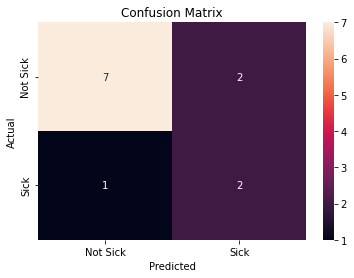

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

actual_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick"]
predicted_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Sick", "Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Not Sick"]
labels = ["Not Sick", "Sick"]

cm = confusion_matrix(actual_data, predicted_data)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

Let's evaluate this in details by having a look at the following image -

\
![alt text](https://drive.google.com/uc?export=view&id=1kByrwoYIfDyTc_K3ds6OCdZ30qODkD6-)


\
From here, we can see that there are 9 correct predictions and 3 incorrect predictions.

\
Let's calculate the accuracy and precision scores for this.

```
accuracy = 2 + 7 / 2 + 7 + 2 + 1
accuracy = 9 / 12
accuracy = 0.75
```

\
Now, let's take a dataset and perform some logistic regression on it to see the accuracy of our model with the confusion matrix.



In [ ]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


Let's see how the age of the person increases the list of a heart attack, by using single variable logistic regression.

In [ ]:
import pandas as pd

df = pd.read_csv("BankNote_Authentication.csv")

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
from sklearn.model_selection import train_test_split 

classe = df["class"]
variance = df["variance"]

classe_train, classe_test, variance_train, variance_test = train_test_split(classe, variance, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(classe_train.ravel(), (len(classe_train), 1))
Y = np.reshape(variance_train.ravel(), (len(variance_train), 1))

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
X_test = np.reshape(classe_test.ravel(), (len(classe_test), 1))
Y_test = np.reshape(variance_test.ravel(), (len(variance_test), 1))

variance_prediction = classifier.predict(X_test)

predicted_values = []
for i in variance_prediction:
  if i == 0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")

AttributeError: ignored

In [ ]:
labels = ["Yes", "No"]

cm = confusion_matrix(actual_values, predicted_values)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

NameError: ignored

From here, we can see the following things -



1.   36 People both actually got a heart attack and were predicted to get a heart attack.
2.   16 People didn't get a heart attack and were also predicted to not get a heart attack.
3.   7 People actually got a heart attack while they were not predicted to get one.
4.   17 people were predicted to get a heart attack while they did not get one.

\
Our model has the accuracy as -
```
accuracy = 36 + 16 / 36 + 16 + 17 + 7
accuracy = 52 / 76
accuracy = 0.68421052631
```

\
What if we use more variables, instead of just age? Will our model's accuracy increase? Let's see!

\
In our data, `cp` stands for `chest pain` and `chol` stands for `cholestrol`. `thalach` stands for `Maximum heart rate achieved`. Let's include these along with the gender of the person.



**Student side code starts here**

In [ ]:
factors = df[["age", "sex", "cp", "chol", "thalach", "fbs", "trestbps","restecg","exang","oldpeak","slope","ca","thal"]]
heart_attack = df["target"]

factors_train, factors_test, heart_attack_train, heart_attack_test = train_test_split(factors, heart_attack, test_size = 0.25, random_state = 0)

Since all of age, sex, cp and chol have different measurement units, let's make them scaler to analyse them well.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

factors_train = sc_x.fit_transform(factors_train)  
factors_test = sc_x.transform(factors_test)

print(factors_train)

[[ 0.35256528  0.70243936  0.9870291  ...  0.96222601  1.22723311
   1.12135917]
 [-0.31068598  0.70243936 -0.91982712 ...  0.96222601  0.25993479
  -0.45968761]
 [-0.08960223  0.70243936  0.9870291  ...  0.96222601 -0.70736353
   1.12135917]
 ...
 [ 0.13148153  0.70243936  1.94045721 ... -0.6557392  -0.70736353
   1.12135917]
 [-0.86339537  0.70243936  0.9870291  ...  0.96222601 -0.70736353
  -0.45968761]
 [ 0.35256528  0.70243936  0.03360099 ... -0.6557392  -0.70736353
  -0.45968761]]


In [ ]:
classifier2 = LogisticRegression(random_state = 0) 
classifier2.fit(factors_train, heart_attack_train)

LogisticRegression(random_state=0)

In [ ]:
heart_attack_prediction_1 = classifier2.predict(factors_test)

predicted_values_1 = []
for i in heart_attack_prediction_1:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")

actual_values_1 = []
for i in heart_attack_test.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

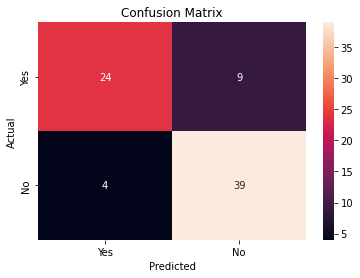

In [ ]:
cm = confusion_matrix(actual_values_1, predicted_values_1)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

From here, we can see the following things -



1.   33 People both actually got a heart attack and were predicted to get a heart attack.
2.   23 People didn't get a heart attack and were also predicted to not get a heart attack.
3.   10 People actually got a heart attack while they were not predicted to get one.
4.   10 people were predicted to get a heart attack while they did not get one.

\
Our model has the accuracy as -
```
accuracy = 33 + 23 / 33 + 23 + 10 + 10
accuracy = 56 / 76
accuracy = 0.73684210526
```

\
With the new model that we just built, we have a higher accuracy to detect if a person will get a heart attack or not.

\
You can try this out with a combination of different set of variables, or add more variables to this to see if that improves the accuracy of the model?